In [1]:
import os 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import custom functions
os.chdir('..')
from FLOCK import DataLoading, Preprocessing, RegularityFeats, PACS


Load data

In [2]:
# Initialize path to data (UTM-converted datasets)
data_dir = os.getcwd() + '\\SampleData'

# Load datasets
raw_datasets = DataLoading.load_data(data_dir)

# Re-shape datasets
datasets = DataLoading.pivot_datsets(raw_datasets)

Get the interpolated data

In [3]:
# get interpolated datasets
interp_datasets = Preprocessing.interpolate_datasets(datasets, threshold = 0.99)

Get movement periods


In [4]:
# get slices for movement periods and break times   
rucks_bySquad, rests_bySquad, all_stops = Preprocessing.get_slices_byArea(interp_datasets, plot=False)

Get the smoothed data of one example squad


In [5]:
smooth_rucks = Preprocessing.spline_smoothing(rucks_bySquad[2], s=3e1, UTM=True)
names = smooth_rucks[0].longitude.columns

PACS location entropy

In [6]:
ruck_slices_oriented = PACS.PACS_transform(smooth_rucks)

re-orienting data


100%|██████████| 6/6 [15:55<00:00, 159.29s/it]


Get PACS location entropy

In [7]:
PACS_entropies = RegularityFeats.PACS_entropy(ruck_slices_oriented, names)
PACS_entropies.columns.name = 'Movement period'
PACS_entropies

Movement period,Member 1,Member 2,Member 3,Member 4,Member 5
0,0.173675,0.211881,0.154054,0.181231,0.161096
1,0.125241,0.140045,0.110799,0.124901,0.131464
2,0.071925,0.079571,0.061459,0.070861,0.063628
3,0.109970,0.157483,0.140835,0.123074,0.101453
4,0.112250,0.096338,0.094658,0.096538,0.079216
5,0.019148,0.018273,0.013057,0.013057,0.018348


Vector autoregression

In [8]:
VAR_errs = RegularityFeats.VAR_model(ruck_slices_oriented, names)

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [01:08<00:00, 11.39s/it]


<AxesSubplot:>

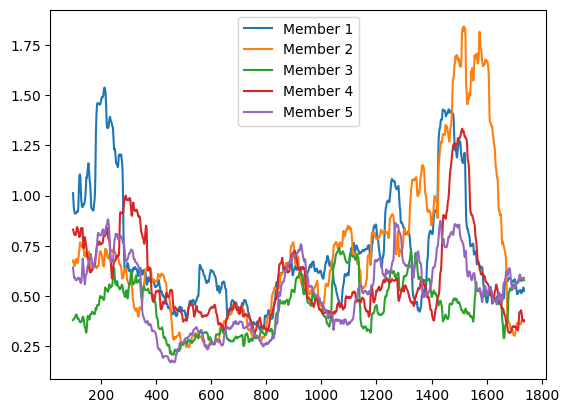

In [9]:
VAR_errs[0].rolling(100).mean().plot()

In [10]:
VARX_errs = RegularityFeats.VARX_model(ruck_slices_oriented, names)

100%|██████████| 6/6 [01:10<00:00, 11.78s/it]


<AxesSubplot:>

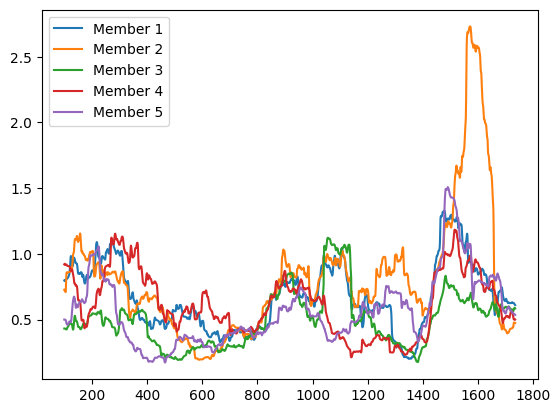

In [11]:
VARX_errs[0].rolling(100).mean().plot()

Time series entropy

In [12]:
VAR_entropies = RegularityFeats.time_series_metric_entropy(VAR_errs, range=[-10,10], bins=100)
VAR_entropies

Member 1    0.437524
Member 2    0.567876
Member 3    0.383784
Member 4    0.450832
Member 5    0.395437
dtype: float64

In [13]:
VARX_entropies = RegularityFeats.time_series_metric_entropy(VARX_errs, range=[-10,10], bins=100)
VARX_entropies

Member 1    0.483135
Member 2    0.540559
Member 3    0.378142
Member 4    0.413356
Member 5    0.401433
dtype: float64